In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [32]:
from sklearn.datasets import fetch_20newsgroups


categories = [
    "alt.atheism",
    "talk.religion.misc",
]

X_train, y_train = fetch_20newsgroups(
    subset="train",
    categories=categories,
    shuffle=True,
    random_state=42,
    remove=("headers", "footers", "quotes"),
    return_X_y=True,
)

X_test, y_test = fetch_20newsgroups(
    subset="test",
    categories=categories,
    shuffle=True,
    random_state=42,
    remove=("headers", "footers", "quotes"),
    return_X_y=True,
)


In [33]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Dell
[nltk_data]     5531\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Dell
[nltk_data]     5531\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Dell
[nltk_data]     5531\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
X_train = pd.DataFrame(X_train)
X_train.head()

,0
0,"Benedikt Rosenau writes, with great authority:..."
1,\n[...stuff deleted...]\n\nComputers are an ex...
2,\n[deletia]\n\n\n In the deletions somewh...
3,...\n\n\tBefore or after his kids were shot?\n...
4,\n


In [35]:
X_test = pd.DataFrame(X_test)
X_test.head()

,0
0,\nThrow away the FAQ. We can all just ask Mr...
1,": At the risk of beginning a cascade, I'll sta..."
2,\n: But how do we know that you're representin...
3,"\n Thanks for the etymology lesson, but I act..."
4,\n\n\n\nI think this should be illuminating to...


In [36]:
print(X_train.shape), print(X_test.shape)

(857, 1)
(570, 1)


(None, None)

In [37]:
X_train = X_train.rename(columns={0: 'text'})
X_test = X_test.rename(columns={0: 'text'})

In [38]:
nltk.download('punkt_tab')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to C:\Users\Dell
[nltk_data]     5531\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Dell
[nltk_data]     5531\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Проведите предобработку данных (очистка текста, удаление стоп-слов, векторизация с использованием TF-IDF).

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer

# Предобработка данных
imputer = SimpleImputer(strategy='constant', fill_value='missing')
# Предобработка данных
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess(text):
    # Токенизация по словам и приведение к нижнему регистру
    words = nltk.word_tokenize(text.lower())
    # Удаление стоп-слов и пунктуации
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(filtered_words)

X_train['cleaned_text'] = X_train['text'].apply(preprocess)
X_test['cleaned_text'] = X_test['text'].apply(preprocess)

In [40]:
X_train.head()

,text,cleaned_text
0,"Benedikt Rosenau writes, with great authority:...",benedikt rosenau writes great authority contra...
1,\n[...stuff deleted...]\n\nComputers are an ex...,stuff deleted computer excellent example evolu...
2,\n[deletia]\n\n\n In the deletions somewh...,deletia deletion somewhere mentioned something...
3,...\n\n\tBefore or after his kids were shot?\n...,kid shot make comment jew nazi ww ii say die h...
4,\n,


In [41]:
# Векторизация текста с помощью TF-IDF
vectorizer_train = TfidfVectorizer().fit(X_train['cleaned_text'])
features_train = vectorizer_train.transform(X_train['cleaned_text'])

vectorizer_test = TfidfVectorizer().fit(X_test['cleaned_text'])
features_test = vectorizer_train.transform(X_test['cleaned_text'])

In [42]:
features_train

<857x11162 sparse matrix of type '<class 'numpy.float64'>'
	with 56859 stored elements in Compressed Sparse Row format>

## Примените к полученным векторам TF-IDF следующие методы понижения размерности:

- PCA (Principal Component Analysis)
- t-SNE (t-distributed Stochastic Neighbor Embedding)
- UMAP (Uniform Manifold Approximation and Projection).

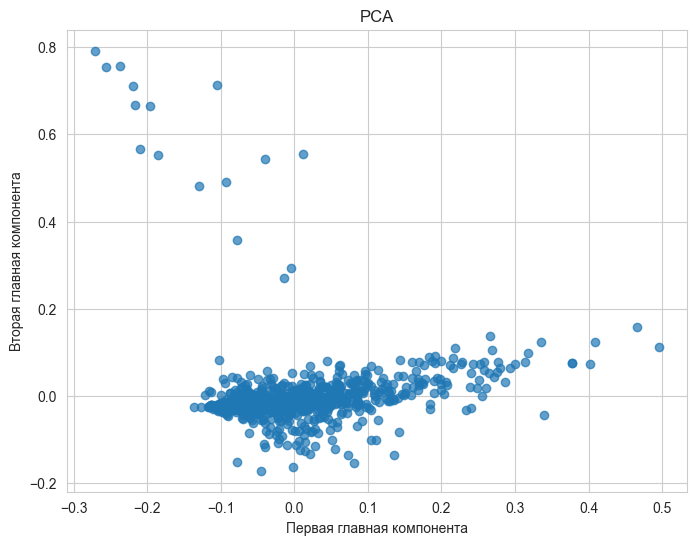

Вклад переменных в первую компоненту: [ 6.67765088e-04  1.33553018e-03 -2.19588814e-05 ...  7.36401788e-04
  6.67765088e-04  1.14143632e-05]
Вклад переменных во вторую компоненту: [ 1.67028995e-04  3.34057989e-04 -6.32907820e-04 ...  4.32061920e-04
  1.67028995e-04 -4.77438022e-05]


In [56]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA()
X_pca = pca.fit_transform(features_train)
X_test_pca = pca.transform(features_test)


# визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('PCA')
plt.grid(True)
plt.show()

# вывод влияния признаков на компоненты
print("Вклад переменных в первую компоненту:", pca.components_[0])
print("Вклад переменных во вторую компоненту:", pca.components_[1])

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn import metrics

lr = LogisticRegression()
lr.fit(X_pca, y_train)

print('PCA - train, score:', lr.score(X_pca, y_train))
print('PCA - test, score:', lr.score(X_test_pca, y_test))


PCA - train, score: 0.9521586931155193
PCA - test, score: 0.6894736842105263


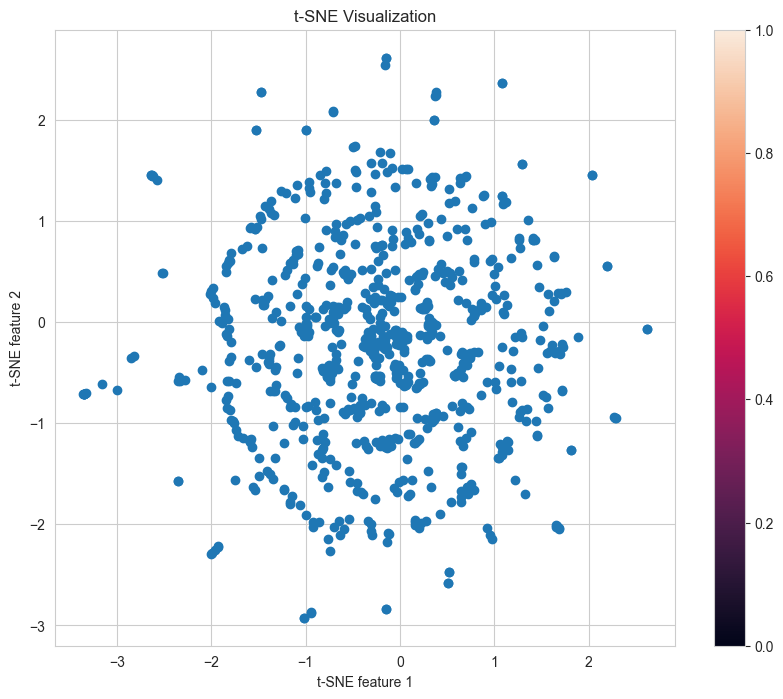

In [58]:
# Применение t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(init='random')
X_tsne = tsne.fit_transform(features_train)
X_test_tsne = tsne.fit_transform(features_test)

# Визуализация
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.colorbar(scatter)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

In [59]:
lr = LogisticRegression()
lr.fit(X_tsne, y_train)

print('TSNE - train, score:', lr.score(X_tsne, y_train))
print('TSNE - test, score:', lr.score(X_test_tsne, y_test))

TSNE - train, score: 0.588098016336056
TSNE - test, score: 0.5596491228070175


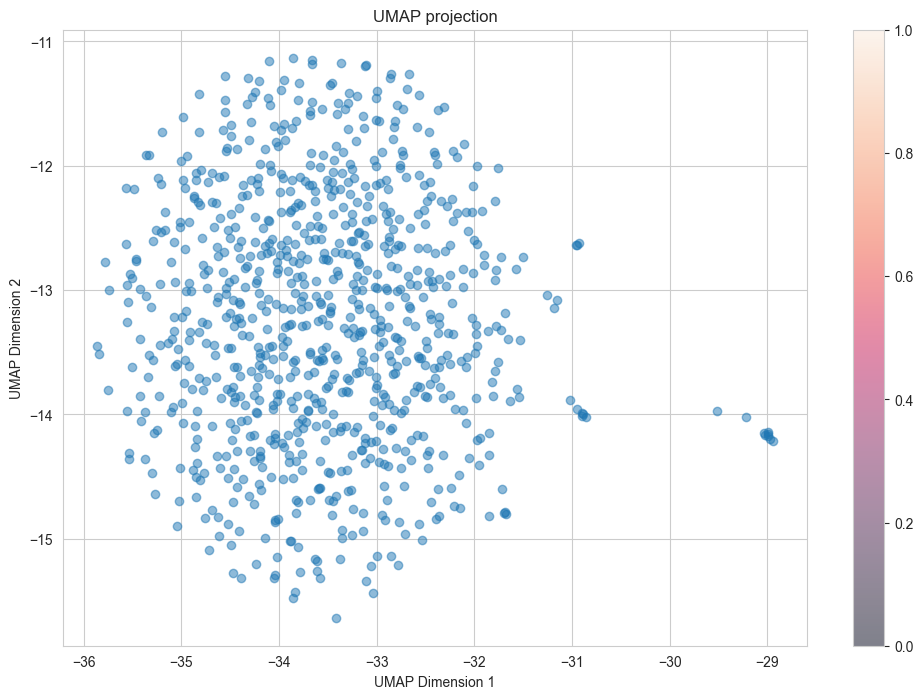

In [62]:
# Применение UMAP
from umap import umap_ as umap

umap_model = umap.UMAP()
X_umap = umap_model.fit_transform(features_train)
X_test_umap = umap_model.transform(features_test)

# Визуализация
plt.figure(figsize=(12, 8))

scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1],alpha=0.5)
plt.colorbar(scatter)
plt.title('UMAP projection')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

In [63]:
lr = LogisticRegression()
lr.fit(X_umap, y_train)

print('UMAP - train, score:', lr.score(X_umap, y_train))
print('UMAP - test, score:', lr.score(X_test_umap, y_test))

UMAP - train, score: 0.5600933488914819
UMAP - test, score: 0.5631578947368421


Были применены следующие методы понижения размерности для задачи классификации публикаций (количество компонент оставлено по умолчанию):
- Метод главных компонент (PCA) - выделение линейных комбинаций признаков, объясняющих максимальную дисперсию данных. 
    Метод показал следующие результаты точности при применении модели логистической регрессии:
    - PCA - train, score: 0.95
    - PCA - test, score: 0.69
    Таким образом, на тренировочной выборке модель переобучилась, так как на тестовой точность почти на 30% меньше.
- t-SNE - нелинейный метод, сохраняющий локальную структуру данных в низкоразмерном пространстве.
    Метод показал следующие результаты точности при применении модели логистической регрессии:
    - TSNE - train, score: 0.59
    - TSNE - test, score: 0.56
    Таким образом, модель не переобучилась, но точность модели достаточно низкая, как на тренировчной выборке, так и на тестовой.
- UMAP - Uniform Manifold Approximation and Projection.
    Метод показал следующие результаты точности при применении модели логистической регрессии:
    - UMAP - train, score: 0.56
    - UMAP - test, score: 0.56
    Модель показала одинаковые результаты по точнсоти модели, как на тетсовой, так и на тренировочной выборках, однако точность модели очень низкая.
    
Самая высокая точность на тестовой выборке в данном случае оказалось при применения метода PCA, для повышения точности модели можно поисследовать гиперпараметры модели и в большей степени количество компонент.